# LetsGrowMore - InternshipJan2022

## Task - Prediction using Decision Tree Algorithm

### By: Harshita Mehta

**Problem Statement**

Create a decision tree classifier and visualize it graphically.
Also, the Purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


In [1]:
# importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset

df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Observation:**

* Iris dataset contains 6 features in which SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm are independent features.

* 1 feature i.e Species is the dependent or Target Variable and the Id column gives serial number for each data point.

* All the independent variables have non-null float values and the target varieable has three class lables i.e Iris-setosa, Iris-versicolor and Iris-virginica.

In [6]:
# describe function gives numerical info about all the numerical columns

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.duplicated().sum()               # no duplicate values in our dataset

0

In [8]:
# checking missing values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# count values for each class lable

df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Visualizing the dataset

Id
Feature: Id


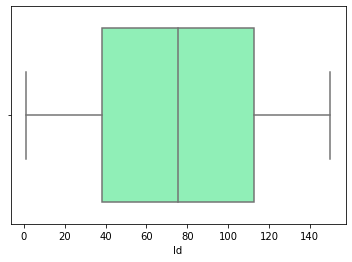

SepalLengthCm
Feature: SepalLengthCm


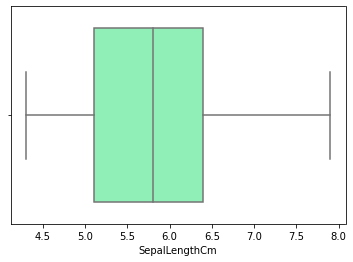

SepalWidthCm
Feature: SepalWidthCm


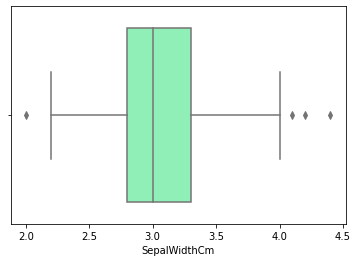

PetalLengthCm
Feature: PetalLengthCm


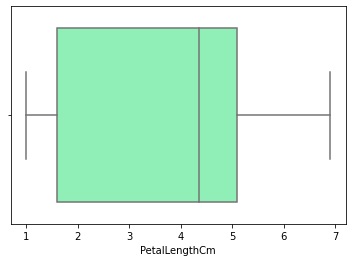

PetalWidthCm
Feature: PetalWidthCm


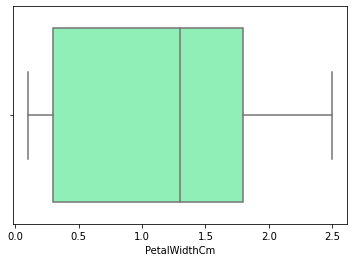

In [10]:
# using boxplot on all feature columns to check outliers in the data

for i in df.columns[:-1]:
    print(i)
    sns.boxplot(x= df[i], data =df, palette ='rainbow')
    print("Feature:", i)
    plt.show()

**Observation**

From the above boxplot, we can observe that there are few values above 4 and below 2 in Sepal width column creating outliers. So, we will treat the outliers using IQR method

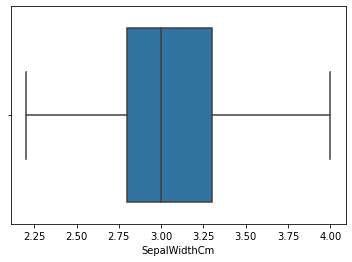

(146, 6)


In [11]:
# IQR

Q1 = np.percentile(df["SepalWidthCm"], 25, interpolation = "midpoint")
Q3 = np.percentile(df["SepalWidthCm"], 75, interpolation = "midpoint")

IQR = Q3-Q1

#upper bound
upper = np.where(df["SepalWidthCm"] >= (Q3+1.5*IQR))

#lower bound
lower = np.where(df["SepalWidthCm"] <= (Q1-1.5*IQR))

# removing outliers
df.drop(upper[0], inplace =True)
df.drop(lower[0], inplace =True)

sns.boxplot(x ="SepalWidthCm", data =df)
plt.show()

print(df.shape)

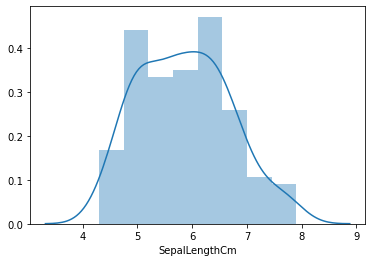

In [12]:
# using distplot which shows the distribution of a univariate set of observations.

sns.distplot(df["SepalLengthCm"])
plt.show()

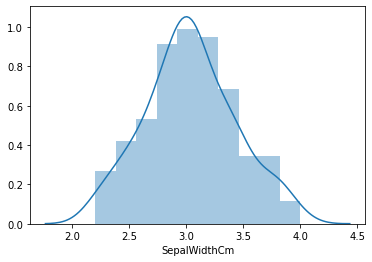

In [13]:
sns.distplot(df["SepalWidthCm"])
plt.show()

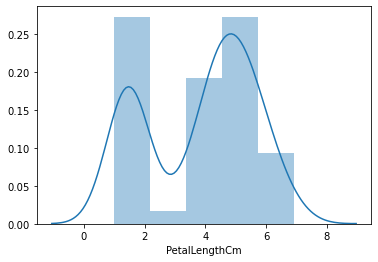

In [14]:
sns.distplot(df["PetalLengthCm"])
plt.show()

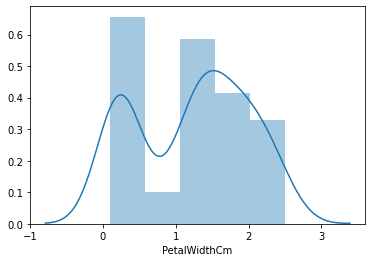

In [15]:
sns.distplot(df["PetalWidthCm"])
plt.show()

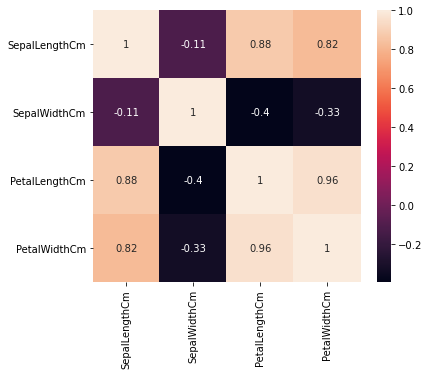

In [16]:
# using heatmap, which shows correlation between all the numerical variablesin the dataset

plt.figure(figsize =(6,5))
sns.heatmap(df.corr(method ="pearson").drop(["Id"], axis =1).drop(["Id"], axis =0), annot = True)
plt.show()

**Observation**

Petal length is highly related to petal width whereas Sepal length is not related to sepal width.

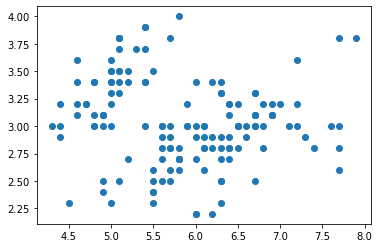

In [17]:
# using scatter plot for better understanding the data

plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"])
plt.show()

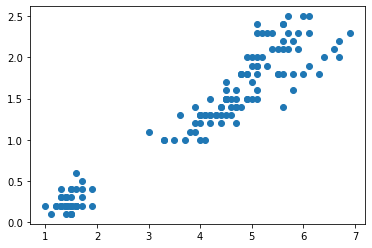

In [18]:
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.show()

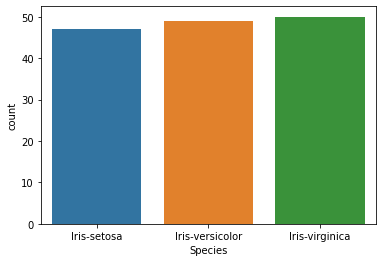

In [19]:
# using countplot 

sns.countplot(x = "Species", data =df)
plt.show()

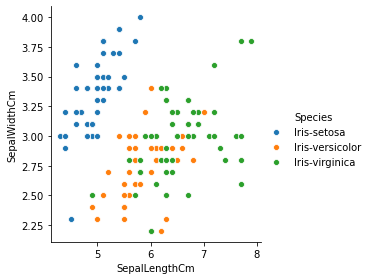

In [20]:
plot = sns.FacetGrid(df, hue = "Species", height = 4)
plot.map(sns.scatterplot, "SepalLengthCm", "SepalWidthCm")
plot.add_legend()
plt.show()

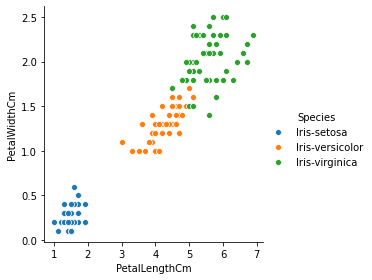

In [21]:
plot = sns.FacetGrid(df, hue = "Species", height = 4)
plot.map(sns.scatterplot, "PetalLengthCm", "PetalWidthCm")
plot.add_legend()
plt.show()

**Observation**

From the above scatter plots, we can say that all the bluepoints(Iris-setosa) are separated perfectly as compared to the orange(Iris-versicolor) and green(Iris-virginica) points for features SepalLengthCm and SepalWidthCm. Similarly for the features PetalLengthCm and PetalWidthCm.

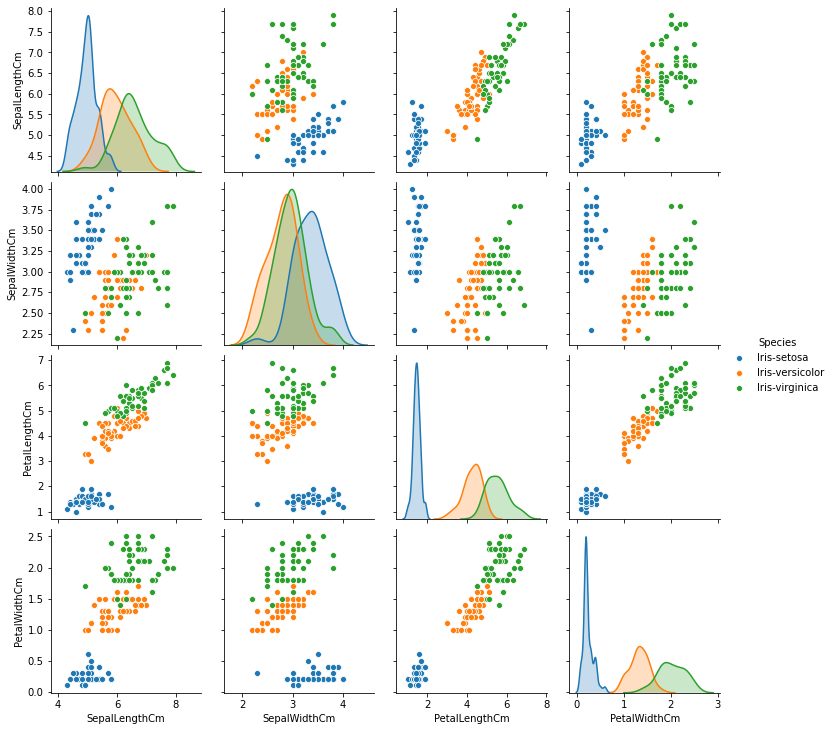

In [22]:
# using pairplot which gives pairwise relationship across entire dataframe.

sns.pairplot(df.drop(["Id"], axis =1), hue ="Species")
plt.show()

**Observation**

From the above pairplot, we can clearly say that the Iris-setosa class is well separated from the other two classes. Also, Iris-versicolor and Iris-virginica are partially overlapping each other.

## Building the Classification Model

In [23]:
# Dropping the Id column as it as no use in classifying the class labels

df.drop(["Id"], axis =1, inplace = True)

In [24]:
# importing libraries 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# Separating the input and target variables

X = df.drop(["Species"], axis = 1)
Y = df["Species"]

print(X)
print(Y)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[146 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

In [26]:
# splitting the dataset into actual training and actual testing dataset
Xtrain, Xtest, Ytrain,Ytest = train_test_split(X,Y, test_size =0.20, random_state = 0)

# splitting the dataset into validation train and validation test dataset
X1train, X1test, Y1train,Y1test = train_test_split(Xtrain,Ytrain, test_size =0.20, random_state = 0)

In [27]:
# creating a decision tree classifier
clf = DecisionTreeClassifier(criterion ="gini")

In [28]:
# training the model on data
clf.fit(X1train, Y1train)

DecisionTreeClassifier()

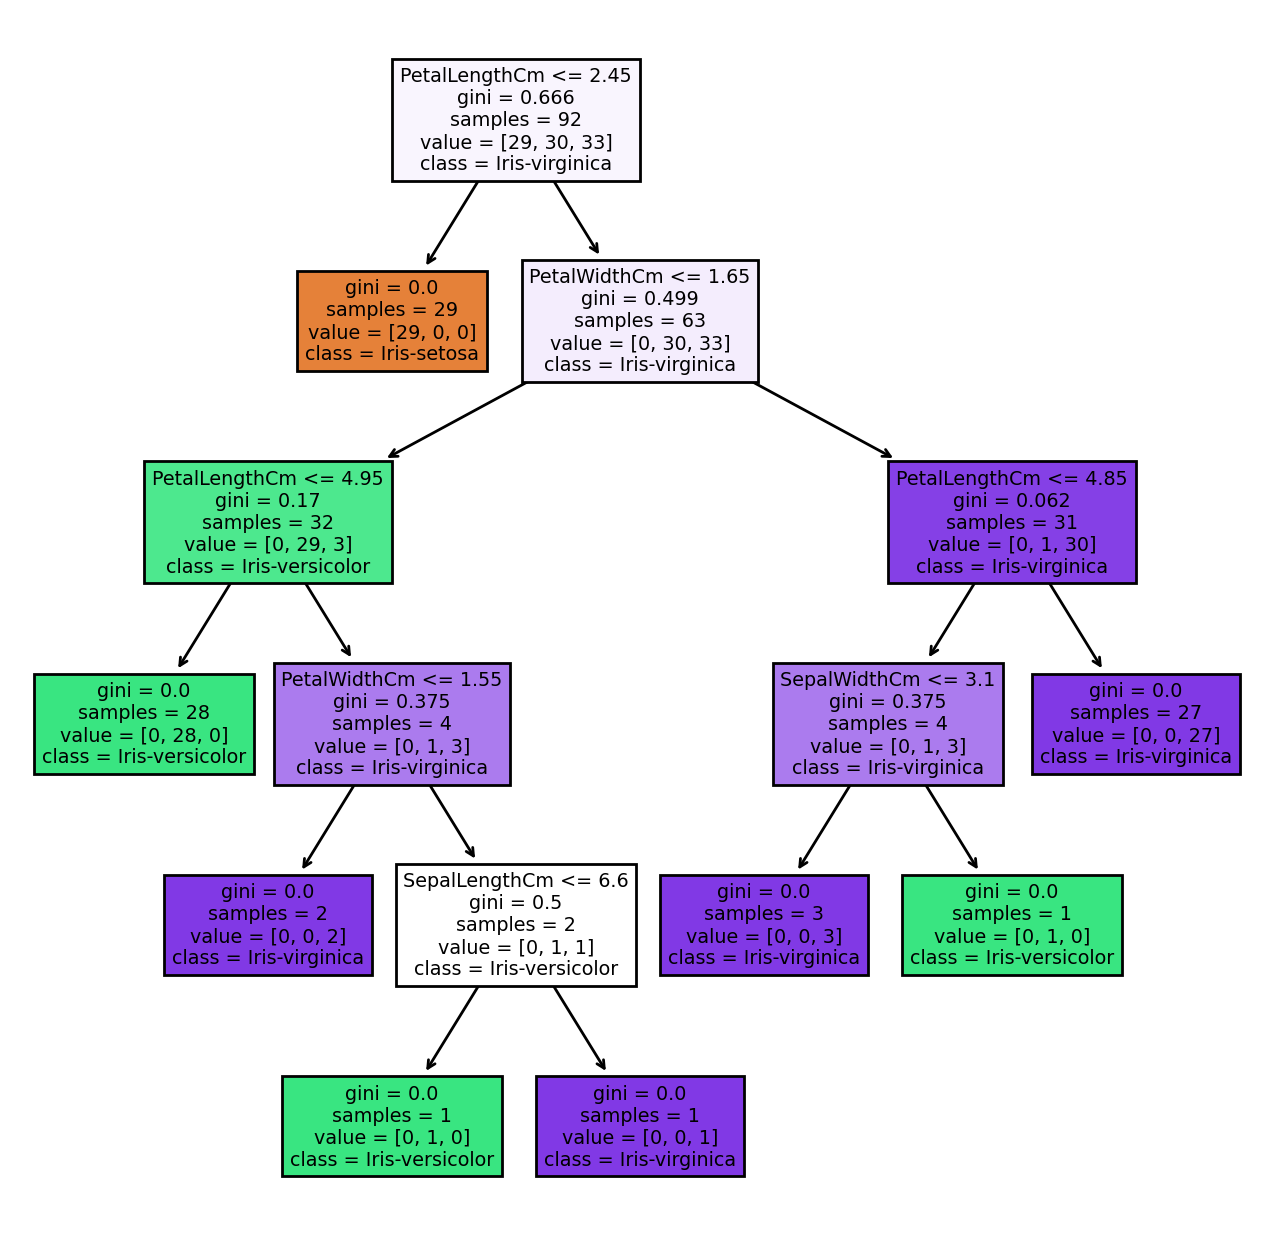

In [29]:
# Visualizing the tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=200)

tree.plot_tree(clf,
           feature_names = ["SepalLengthCm","SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
           class_names= ["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
           filled = True);

In [30]:
# Now we will validate the decision tree using cross-validation method to get the performance score of the model

print("Accuracy score:", cross_val_score(clf, X1train, Y1train, cv = 3, n_jobs =-1, 
                                                     scoring ="accuracy", verbose=0).mean())

Accuracy score: 0.956989247311828


In [31]:
# check validation test data on trained model

Y1pred = clf.predict(X1test)

print("Accuracy score for validation test data:", accuracy_score(Y1test, Y1pred))

Accuracy score for validation test data: 0.9583333333333334


**Observation**

We can see that the selected features are working well and model gives good accuracy on validation test data.
So, now we will train our model on the actual train dataset.

In [32]:
# trainnig the model on actual train dataset

dt_clf = DecisionTreeClassifier(criterion ="gini", min_samples_split =2)
dt_clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

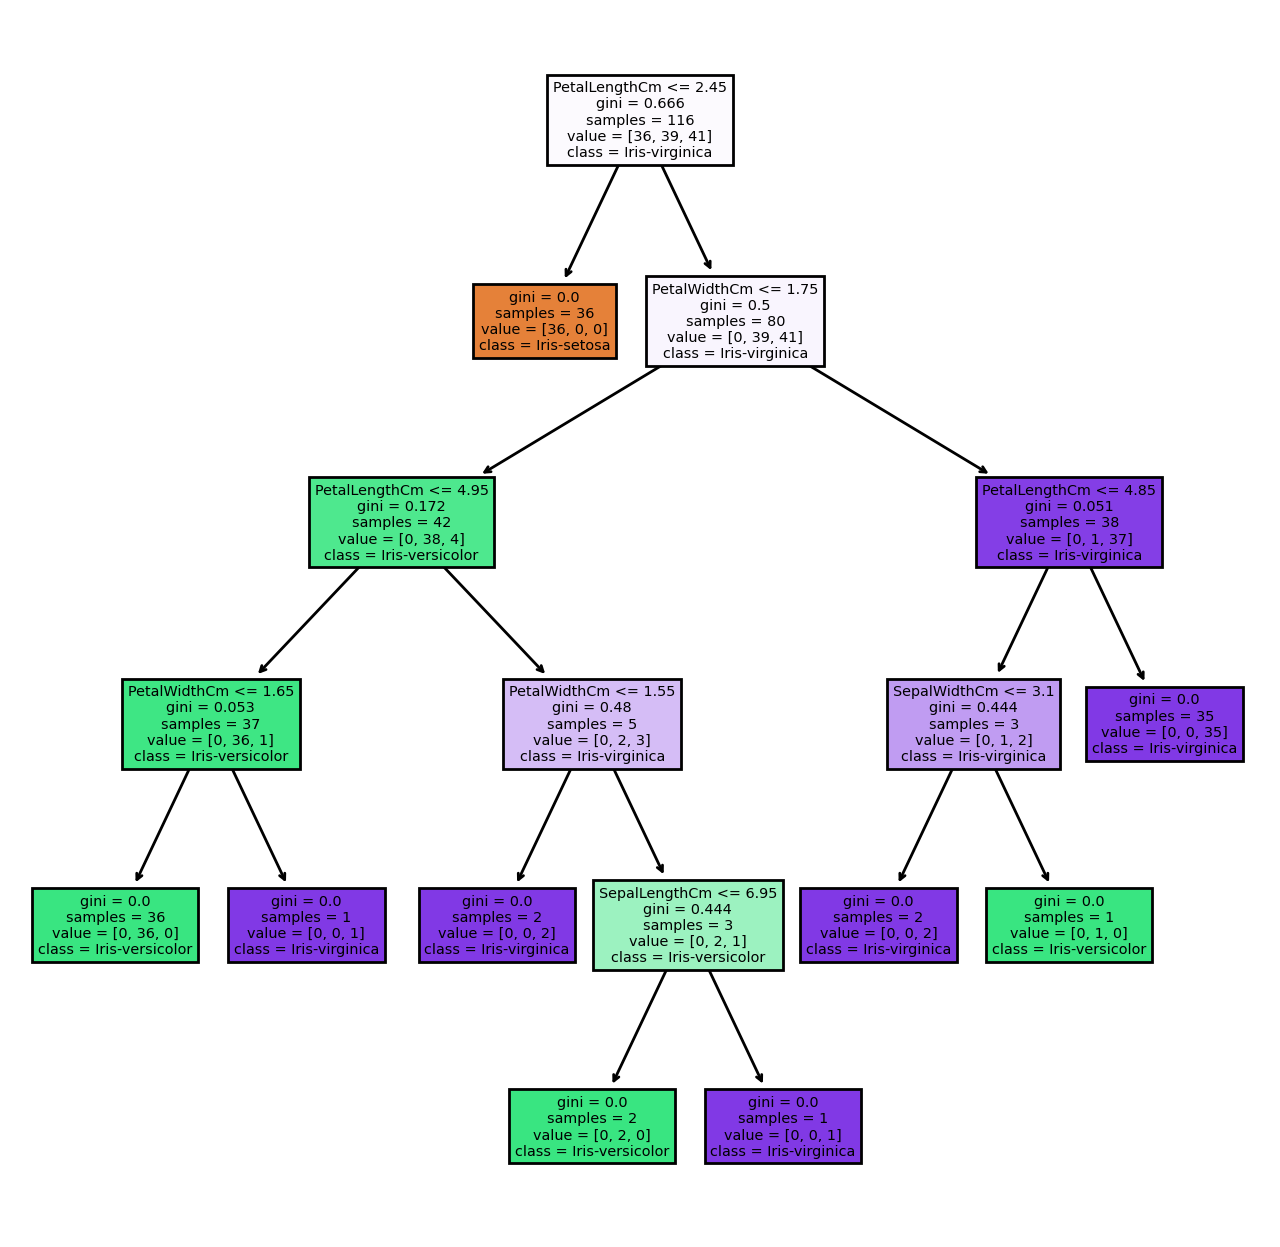

In [33]:
# Visualizing the tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=200)

tree.plot_tree(dt_clf,
           feature_names = ["SepalLengthCm","SepalWidthCm", "PetalLengthCm", "PetalWidthCm"],
           class_names= ["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
           filled = True);

## Evaluating the model

In [34]:
# checking model performance on actual test dataset

Ypred = dt_clf.predict(Xtest)

print("Accuracy score on actual test dataset:", accuracy_score(Ytest, Ypred))

Accuracy score on actual test dataset: 1.0


In [35]:
print("Confusion Matrix: "'\n',confusion_matrix(Ytest, Ypred))

Confusion Matrix: 
 [[11  0  0]
 [ 0 10  0]
 [ 0  0  9]]


In [36]:
print("Classification_report :" , classification_report(Ytest, Ypred))

Classification_report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [37]:
# Feeding new data to the classifier to check model performance on new data points.
# Here, we used out trained model to make predictions. 

test_points = [[5.2,3.0,4.5,1.5],
               [4.6,1.4,4.6,3.1],
               [5.1,5.5,3.0,1.1],
               [2.7,3.3,1.7,0.5],
               [5.0,2.7,5.1,2.6],]

print(dt_clf.predict(test_points))

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica']
